In [25]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# **3. Modeling**

# Importação do *dataset* normalizado

In [26]:
data_path = '../data/' #if os.path.exists('../data/') #else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'

cvd_df_processed = pd.read_csv(data_path + 'CVD_normalized_discretized_processed.csv')

# Separar atributos (X) e o alvo (y)
X = cvd_df_processed.drop(columns=['Heart_Disease'])  # Substitua 'Heart_Disease' pelo nome exato do atributo alvo, se for diferente
y = cvd_df_processed['Heart_Disease']

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algoritmos de Aprendizagem Supervisionada

## *Decision Trees*

Acurácia do modelo Decision Tree: 0.92

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.53      0.03      0.06      4997

    accuracy                           0.92     61771
   macro avg       0.73      0.51      0.51     61771
weighted avg       0.89      0.92      0.89     61771



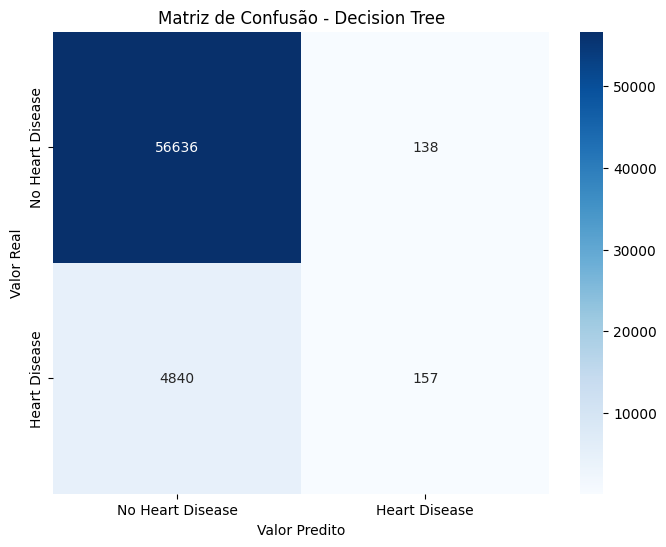


Importância dos Atributos:
                              Importância
Age_Category                     0.512911
Diabetes                         0.188065
General_Health                   0.159313
Sex                              0.108980
Arthritis                        0.019507
Smoking_History                  0.006580
Depression                       0.003513
Other_Cancer                     0.001131
Skin_Cancer                      0.000000
Exercise                         0.000000
Checkup                          0.000000
Height_(cm)                      0.000000
Weight_(kg)                      0.000000
BMI                              0.000000
Alcohol_Consumption              0.000000
Fruit_Consumption                0.000000
Green_Vegetables_Consumption     0.000000
FriedPotato_Consumption          0.000000
BMI_classes                      0.000000
Alcohol_Consumption_class        0.000000


In [27]:
# Inicializar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Ajuste max_depth conforme necessário

# Treinar o modelo com os dados de treino
dt_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Decision Tree: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - Decision Tree")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()

# Importância dos atributos
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=['Importância'])
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)
print("\nImportância dos Atributos:")
print(feature_importances)


## *Multi-Layer Perception* (MLP)

Acurácia do modelo MLP: 0.92

Relatório de Classificação (MLP):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.48      0.03      0.05      4997

    accuracy                           0.92     61771
   macro avg       0.70      0.51      0.51     61771
weighted avg       0.89      0.92      0.88     61771



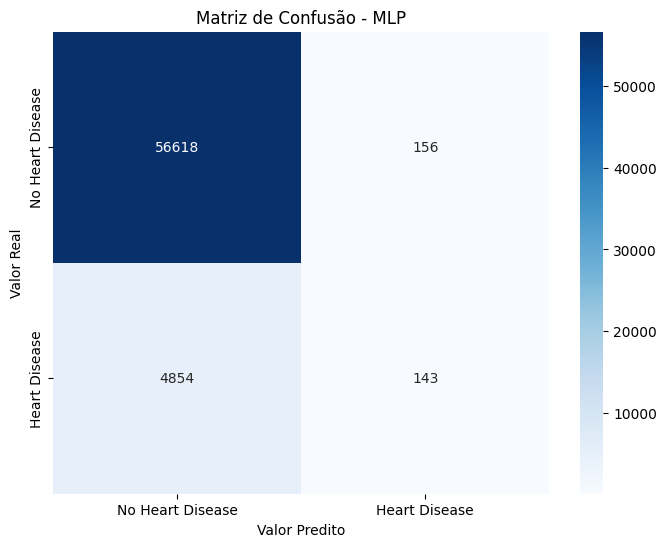

In [29]:
# Inicializar o modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100),  # Uma camada oculta com 100 neurônios
    activation='relu',          # Função de ativação ReLU
    solver='adam',              # Otimizador Adam
    max_iter=300,               # Número máximo de iterações
    random_state=42             # Para reprodutibilidade
)

# Treinar o modelo com os dados de treino
mlp_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_mlp = mlp_model.predict(X_test)

# Avaliar o modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia do modelo MLP: {accuracy_mlp:.2f}")
print("\nRelatório de Classificação (MLP):")
print(classification_report(y_test, y_pred_mlp))

# Matriz de confusão
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - MLP")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()


## *k-Nearest Neighbors*

Acurácia do modelo K-NN: 0.91

Relatório de Classificação (K-NN):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56774
           1       0.32      0.09      0.14      4997

    accuracy                           0.91     61771
   macro avg       0.62      0.54      0.55     61771
weighted avg       0.88      0.91      0.89     61771



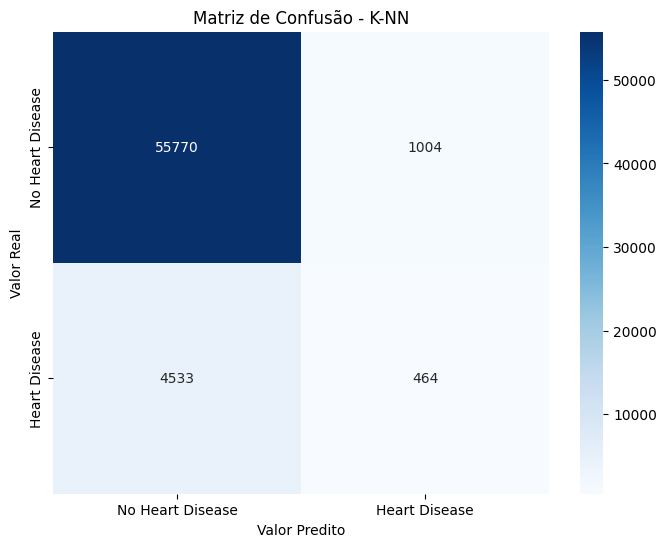

In [31]:
# Inicializar o modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5,     # Número de vizinhos (ajuste conforme necessário)
                                 weights='uniform',  # Pesos uniformes ou baseados na distância
                                 algorithm='auto',   # Algoritmo para calcular os vizinhos
                                 metric='minkowski', # Distância padrão (Minkowski, similar à Euclidiana)
                                 n_jobs=-1)          # Utilizar todos os núcleos para otimizar a execução

# Treinar o modelo com os dados de treino
knn_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

# Avaliar o modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do modelo K-NN: {accuracy_knn:.2f}")
print("\nRelatório de Classificação (K-NN):")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - K-NN")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()

# Algoritmos de Aprendizagem Não-Supervisionada

## *k-Means*

Arquivo carregado com sucesso!
Contagem de observações por cluster:
Cluster
0    9898
1    6283
2    5354
3    3436
Name: count, dtype: int64


C:\Users\leono\AppData\Local\Temp\ipykernel_8044\343227745.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd_df_yes['Cluster'] = kmeans.fit_predict(cvd_df_yes_scaled)


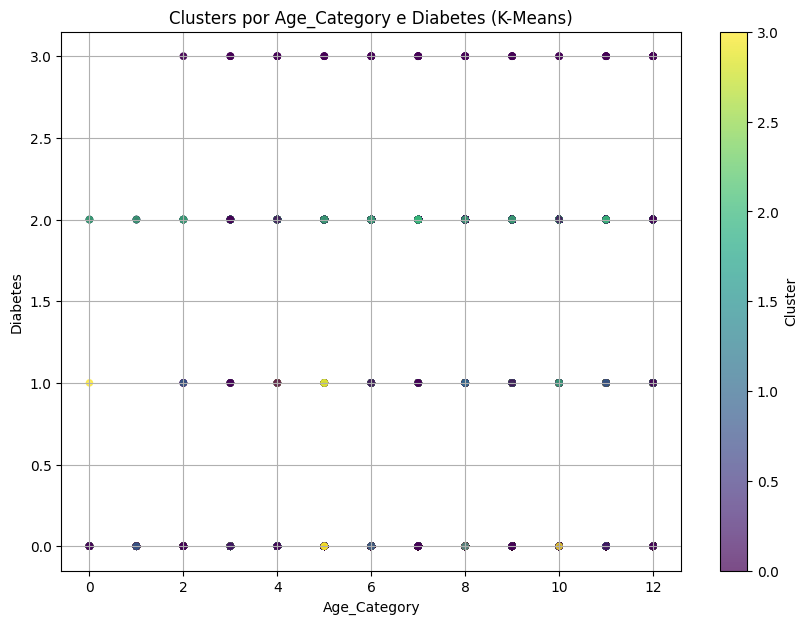

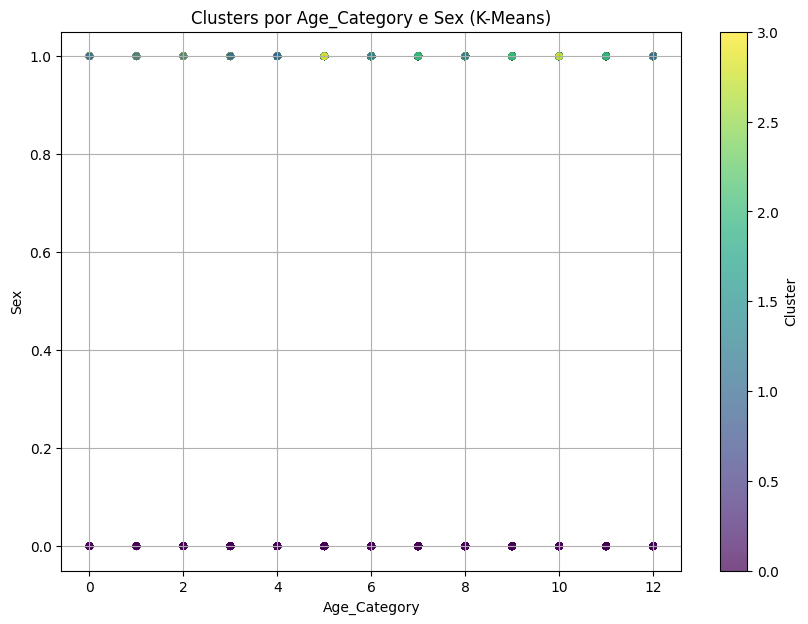

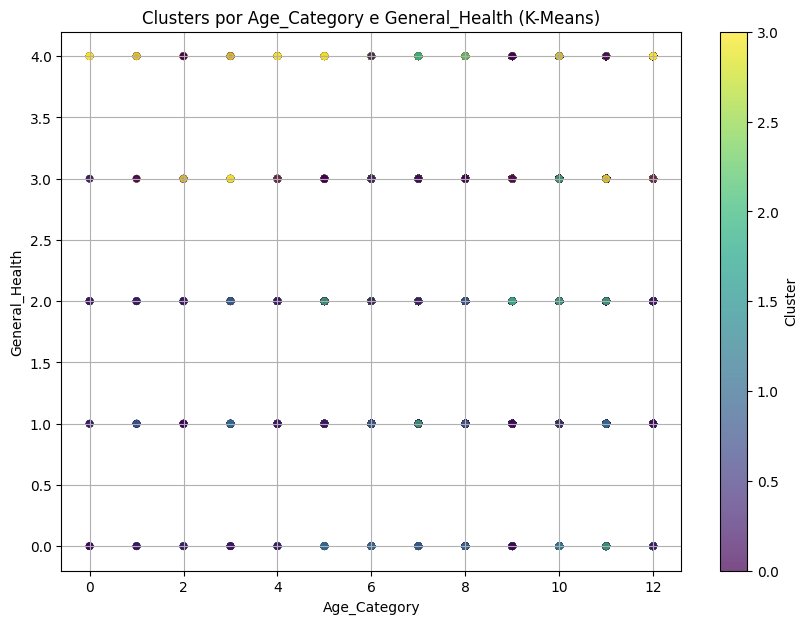

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Caminho para os dados
data_path = '../data/'  # Ajuste o caminho conforme necessário

# Carregar o dataset
try:
    cvd_df_processed = pd.read_csv(data_path + 'CVD_normalized_discretized_processed.csv')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo especificado não foi encontrado. Verifique o caminho.")
    exit()


# Verificar e corrigir o nome da coluna 'Heart_Disease', se necessário
if 'Heart_Disease' not in cvd_df_processed.columns:
    cvd_df_processed.rename(columns=lambda x: x.strip().lower(), inplace=True)
    if 'heart_disease' in cvd_df_processed.columns:
        cvd_df_processed.rename(columns={'heart_disease': 'Heart_Disease'}, inplace=True)
    else:
        print("Erro: A coluna 'Heart_Disease' não foi encontrada.")
        exit()

# Filtrar as linhas onde Heart_Disease = 'Yes'
cvd_df_yes = cvd_df_processed[cvd_df_processed['Heart_Disease'] == 1]

# Verificar se o filtro retornou dados
if cvd_df_yes.empty:
    print("Erro: Nenhuma linha encontrada onde 'Heart_Disease' é 1.")
    exit()

# Selecionar colunas de interesse
key_features = ['Age_Category', 'Sex', 'General_Health', 'Diabetes']
cvd_df_yes_features = cvd_df_yes[key_features]

# Normalizar os dados com Min-Max Scaling
scaler = MinMaxScaler()
cvd_df_yes_scaled = scaler.fit_transform(cvd_df_yes_features)

# Aplicar o K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Escolha o número de clusters
cvd_df_yes['Cluster'] = kmeans.fit_predict(cvd_df_yes_scaled)

# Exibir a contagem de observações por cluster
print("Contagem de observações por cluster:")
print(cvd_df_yes['Cluster'].value_counts())

# Visualizar os clusters usando Age_Category e Diabetes
plt.figure(figsize=(10, 7))
plt.scatter(
    cvd_df_yes['Age_Category'],
    cvd_df_yes['Diabetes'],
    c=cvd_df_yes['Cluster'],
    cmap='viridis',
    s=20,
    alpha=0.7
)
plt.title('Clusters por Age_Category e Diabetes (K-Means)')
plt.xlabel('Age_Category')
plt.ylabel('Diabetes')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Visualizar outros pares de features
for feature in ['Sex', 'General_Health']:
    plt.figure(figsize=(10, 7))
    plt.scatter(
        cvd_df_yes['Age_Category'],
        cvd_df_yes[feature],
        c=cvd_df_yes['Cluster'],
        cmap='viridis',
        s=20,
        alpha=0.7
    )
    plt.title(f'Clusters por Age_Category e {feature} (K-Means)')
    plt.xlabel('Age_Category')
    plt.ylabel(feature)
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

## *DBScan*

Arquivo carregado com sucesso!
Colunas no DataFrame:
Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


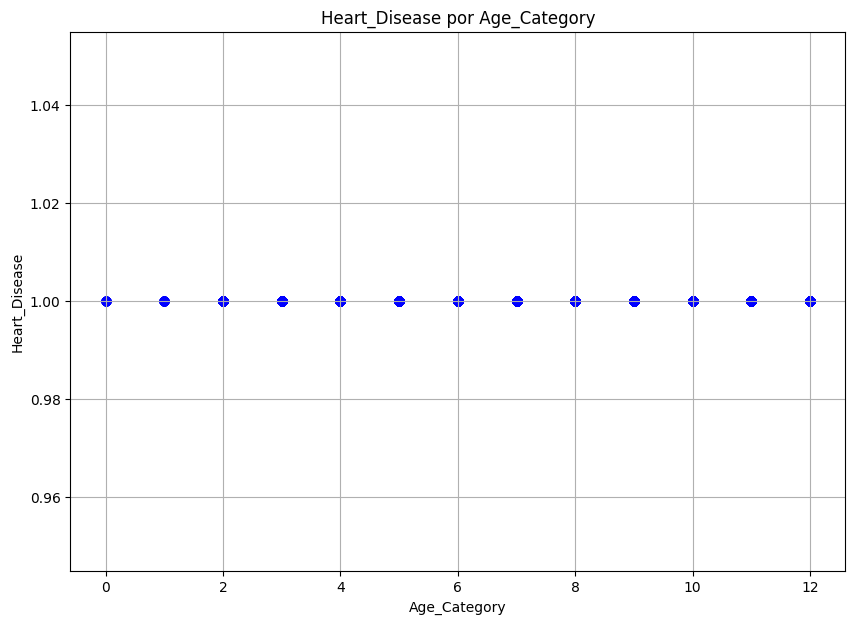

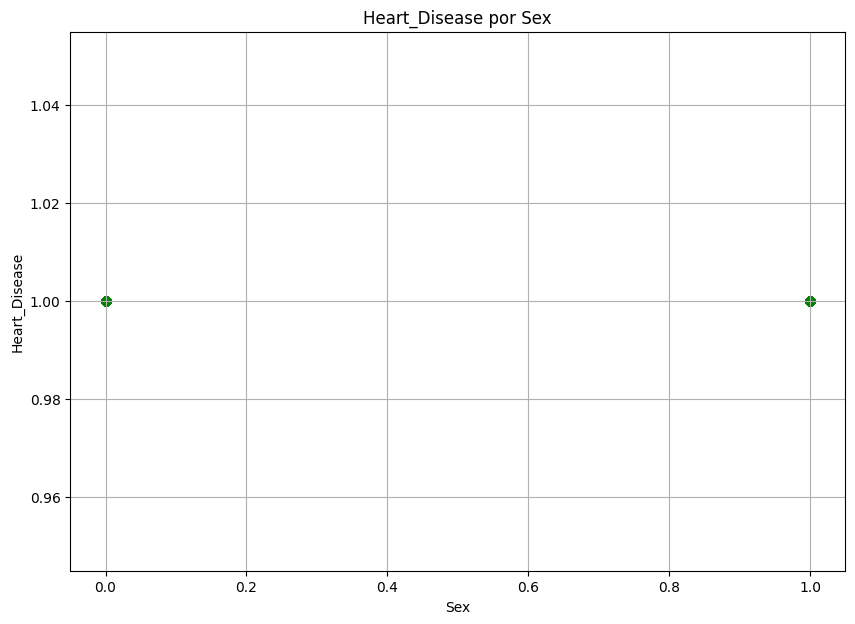

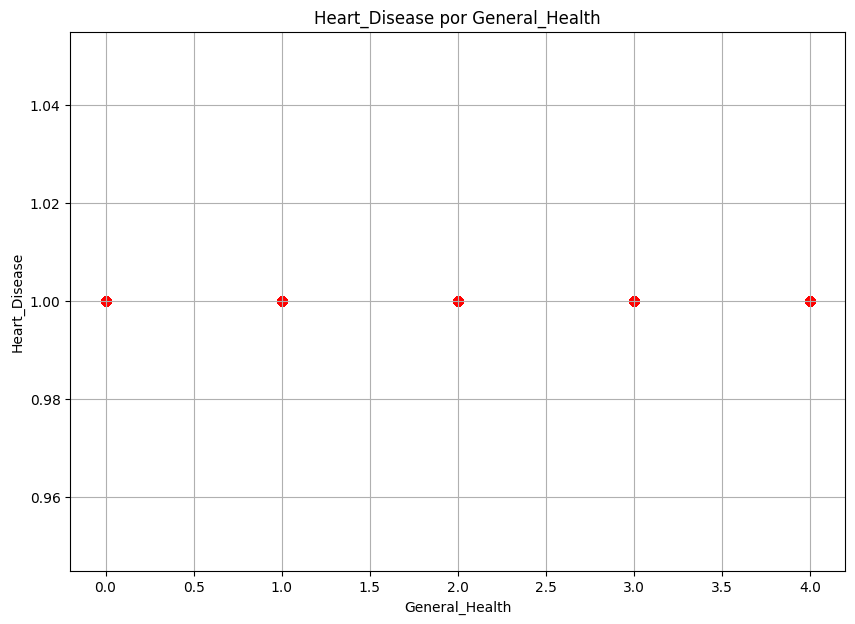

In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Caminho para os dados
data_path = '../data/'  # Ajuste o caminho conforme necessário

# Carregar o dataset
try:
    cvd_df_processed = pd.read_csv(data_path + 'CVD_normalized_discretized_processed.csv')
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo especificado não foi encontrado. Verifique o caminho.")
    exit()

# Verificar as colunas no dataset
print("Colunas no DataFrame:")
print(cvd_df_processed.columns)

# Verificar e corrigir o nome da coluna 'Heart_Disease', se necessário
if 'Heart_Disease' not in cvd_df_processed.columns:
    cvd_df_processed.rename(columns=lambda x: x.strip().lower(), inplace=True)
    if 'heart_disease' in cvd_df_processed.columns:
        cvd_df_processed.rename(columns={'heart_disease': 'Heart_Disease'}, inplace=True)
    else:
        print("Erro: A coluna 'Heart_Disease' não foi encontrada.")
        exit()

# Filtrar as linhas onde Heart_Disease = 'Yes'
cvd_df_yes = cvd_df_processed[cvd_df_processed['Heart_Disease'] == 1]  # Ajuste para valores numéricos ou categóricos

# Verificar se o filtro retornou dados
if cvd_df_yes.empty:
    print("Erro: Nenhuma linha encontrada onde 'Heart_Disease' é 1.")
    exit()

# Relação entre Heart_Disease e Age_Category
plt.figure(figsize=(10, 7))
plt.scatter(
    cvd_df_yes['Age_Category'],
    cvd_df_yes['Heart_Disease'],
    c='blue',
    alpha=0.6
)
plt.title('Heart_Disease por Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Heart_Disease')
plt.grid(True)
plt.show()

# Relação entre Heart_Disease e Sex
plt.figure(figsize=(10, 7))
plt.scatter(
    cvd_df_yes['Sex'],
    cvd_df_yes['Heart_Disease'],
    c='green',
    alpha=0.6
)
plt.title('Heart_Disease por Sex')
plt.xlabel('Sex')
plt.ylabel('Heart_Disease')
plt.grid(True)
plt.show()

# Relação entre Heart_Disease e General_Health
plt.figure(figsize=(10, 7))
plt.scatter(
    cvd_df_yes['General_Health'],
    cvd_df_yes['Heart_Disease'],
    c='red',
    alpha=0.6
)
plt.title('Heart_Disease por General_Health')
plt.xlabel('General_Health')
plt.ylabel('Heart_Disease')
plt.grid(True)
plt.show()